In [1]:
import sys
if ".." not in sys.path:
    sys.path.append("..")
from roplot import FieldPowerPlay, Robot
import matplotlib.pyplot as plt
from shapely import Point

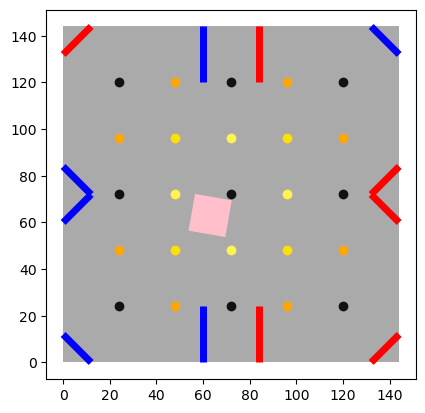

In [2]:
fig = plt.figure()
ax = plt.gca()
fpp = FieldPowerPlay()
fpp.draw_on_axes(ax)

r = Robot((16,16))
r.position = Point(63, 63)
r.heading = 10
r.draw_on_axes(ax)

In [3]:
from roplot.field import FieldLinesPowerPlay
fl = FieldLinesPowerPlay._lines.T.items()
fl

<generator object DataFrame.items at 0x7f885def5000>

In [4]:
from branca.element import Figure
import geopandas as gpd
import folium
crs = "Simple"
fig2 = Figure(width=550, height=550)
m2=folium.Map(location=[72, 72], zoom_start=1, tiles=None, crs=crs)
fpp.add_to(m2)
# folium.GeoJson(gpd.GeoSeries(field).to_json()).add_to(m2)
m2

In [5]:
from folium import GeoJson
from typing import Callable

fig2 = Figure(width=550, height=550)
m1=folium.Map(location=[72, 72], zoom_start=1, tiles=None, crs=crs)

def style_line_color(color:str) -> Callable:
    def sf(nonsense):
        return {"color": color}
    return sf
    
for color in ("red", "blue"):
    gj = GeoJson(gpd.GeoSeries(fpp.field_lines.by_color(color)).to_json(),
                style_function=style_line_color(color))
    gj.add_to(m1)
# GeoJson().add_to(m2)
m1

In [6]:
gj.style = {"lineColor": "red"}